In [99]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

Importing the data using read_csv


In [66]:
speed = pd.read_csv("..\\data\\raw\\realTraffic\\realTraffic\\speed_6005.csv")
Travel_time = pd.read_csv("..\\data\\raw\\realTraffic\\realTraffic\\TravelTime_387.csv")
nyc_taxi = pd.read_csv("..\\data\\raw\\realKnownCause\\realKnownCause\\nyc_taxi.csv")

These are all real world examples of large data sets with some anomalies. The travel time and speed are some data sets from Michigan Department of Transportation taken from a variety of sensors. The nyc taxi data set looks at the number of taxi passengers in 30 minute time intervals. This data set has some known anomlies. These are just times throuhgout the year when there is some event that causes a large change in the number of requested taxis like christmas, nyc marathan, and others. First, we are just going to graph these data sets and look at what the distribution of values look like to get some sense of what we should be expecting.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CC0B4B0AC8>]],
      dtype=object)

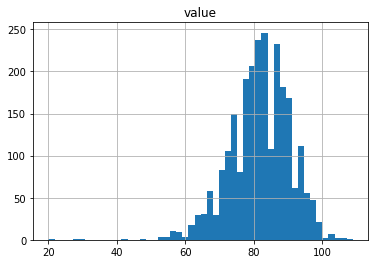

In [67]:
speed.hist(bins=50)

In [68]:
speed.describe()

,value
count,2500.000000
mean,81.906800
std,8.746606
min,20.000000
25%,77.000000
50%,82.000000
75%,88.000000
max,109.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CC0C49FF28>]],
      dtype=object)

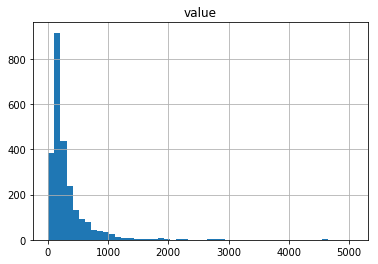

In [69]:
Travel_time.hist(bins=50)

In [70]:
Travel_time.describe()

,value
count,2500.000000
mean,325.093600
std,399.555124
min,9.000000
25%,133.000000
50%,201.000000
75%,366.000000
max,5059.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CC0C572828>]],
      dtype=object)

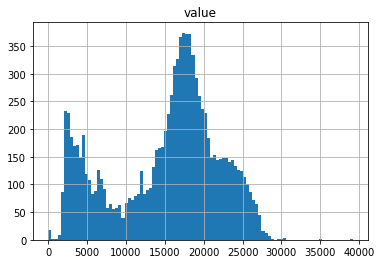

In [71]:
nyc_taxi.hist(bins=100)

In [72]:
nyc_taxi.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


Now we are going to use the isolation forrest algorithm to get outliers for these 3 data sets. We're using the sklearn implementation of this. This has the method fit_predict which will return an array corresponding to the input array where anomalies are -1 and "normal" values are 1. Then we sanity check these values with what we see from the distributions above to make sure that the algorithm is saying reasonable things. All of the results we got seem to make sense. These are single variable distributions so it's not that hard to think about whether or not these things are outliers. The speed data set looks kind of like a normal distribution so you can just ask how far it is from mean and then claim that some number of stddevs is an "outlier"; it looks like this isolation forrest results in something similar to this. The other two data sets aren't really like normal distributions but it seems like the outliers are just things that are really far away from normal where "normal" in these distributions is probably something closer to median than mean

In [73]:
X = []
for val in speed.value:
    X.append([val])
speed_anomalies = IsolationForest().fit_predict(X)
print("percentage anomalies:", speed_anomalies.tolist().count(-1)/ 2500)

percentage anomalies: 0.2552


Kind of interesting what we are seeing here. Looks like this algorithm is classifying everything less than 72mph and greater than 91 mph as anomalies. This is something 1.2 std deviations from the mean if were looking at this thing as something close to a normal distribution. This makes sense I guess. About 25% of these values are considered anomalies.

In [74]:
speed_anomalies = list(zip(speed.value, speed_anomalies))
print(speed_anomalies[:100])

[(90, 1), (80, 1), (84, 1), (94, -1), (90, 1), (91, 1), (62, -1), (96, -1), (75, 1), (84, 1), (86, 1), (93, -1), (69, -1), (88, 1), (71, -1), (74, 1), (68, -1), (88, 1), (71, -1), (87, 1), (82, 1), (68, -1), (73, -1), (69, -1), (57, -1), (43, -1), (47, -1), (73, -1), (78, 1), (83, 1), (87, 1), (77, 1), (80, 1), (69, -1), (63, -1), (78, 1), (66, -1), (72, -1), (54, -1), (73, -1), (82, 1), (90, 1), (92, 1), (63, -1), (69, -1), (97, -1), (85, 1), (86, 1), (84, 1), (88, 1), (78, 1), (88, 1), (80, 1), (75, 1), (88, 1), (69, -1), (84, 1), (76, 1), (84, 1), (87, 1), (87, 1), (67, -1), (62, -1), (84, 1), (89, 1), (81, 1), (84, 1), (85, 1), (89, 1), (81, 1), (91, 1), (82, 1), (94, -1), (85, 1), (102, -1), (76, 1), (86, 1), (87, 1), (83, 1), (93, -1), (87, 1), (80, 1), (87, 1), (75, 1), (75, 1), (68, -1), (94, -1), (77, 1), (82, 1), (94, -1), (78, 1), (84, 1), (82, 1), (100, -1), (68, -1), (81, 1), (93, -1), (91, 1), (78, 1), (77, 1)]


In [75]:
X_travel_time = []
for val in Travel_time.value:
    X_travel_time.append([val])
travel_time_anomalies = IsolationForest().fit_predict(X_travel_time)
print("percentage anomalies:", travel_time_anomalies.tolist().count(-1)/ 2500)

percentage anomalies: 0.1864


In [76]:
travel_time_anomalies = list(zip(Travel_time.value, travel_time_anomalies))
print(travel_time_anomalies[:100])

[(564, -1), (730, -1), (770, -1), (910, -1), (1035, -1), (1065, -1), (953, -1), (1005, -1), (996, -1), (901, -1), (939, -1), (988, -1), (1020, -1), (876, -1), (870, -1), (809, -1), (884, -1), (926, -1), (829, -1), (712, -1), (624, -1), (632, -1), (596, -1), (510, 1), (526, 1), (99, 1), (85, 1), (85, 1), (87, 1), (93, 1), (57, -1), (101, 1), (177, 1), (221, 1), (332, 1), (338, 1), (263, 1), (304, 1), (358, 1), (385, 1), (397, 1), (426, 1), (461, 1), (418, 1), (448, 1), (432, 1), (416, 1), (425, 1), (439, 1), (423, 1), (370, 1), (404, 1), (387, 1), (185, 1), (184, 1), (104, 1), (108, 1), (121, 1), (120, 1), (127, 1), (52, -1), (93, 1), (151, 1), (161, 1), (160, 1), (177, 1), (193, 1), (119, 1), (143, 1), (151, 1), (138, 1), (143, 1), (146, 1), (173, 1), (226, 1), (206, 1), (243, 1), (238, 1), (294, 1), (226, 1), (209, 1), (222, 1), (136, 1), (129, 1), (133, 1), (182, 1), (253, 1), (218, 1), (216, 1), (203, 1), (143, 1), (103, 1), (162, 1), (180, 1), (223, 1), (282, 1), (262, 1), (289, 1)

In [97]:
X_nyc_taxi = []
for val in nyc_taxi.value:
    X_nyc_taxi.append([val])
nyc_taxi_anomalies = IsolationForest().fit_predict(X_nyc_taxi)
print("percentage anomalies:", nyc_taxi_anomalies.tolist().count(-1)/ 10320)

percentage anomalies: 0.4950581395348837


Not exactly sure why such a high percentage of these are being classified as outliers. The only outliers in these data sets as defined by the data set are very specific events throughout the year when taxi volume is substantially different than normal. Here, 50% of the 30min intervals are being classified as outliers

In [98]:
nyc_taxi_anomalies = list(zip(nyc_taxi.value, nyc_taxi_anomalies))
print(nyc_taxi_anomalies[:100])

[(10844, -1), (8127, -1), (6210, -1), (4656, -1), (3820, -1), (2873, -1), (2369, -1), (2064, -1), (2221, -1), (2158, -1), (2515, -1), (4364, -1), (6526, -1), (11039, -1), (13857, 1), (15865, 1), (17920, 1), (20346, 1), (19539, 1), (20107, 1), (18984, 1), (17720, 1), (17249, 1), (18463, 1), (18908, 1), (18886, 1), (18178, 1), (19459, 1), (19546, 1), (20591, 1), (19380, 1), (18544, 1), (16228, 1), (15013, 1), (17203, 1), (19525, 1), (22966, -1), (27598, -1), (26827, -1), (24904, -1), (22875, -1), (20394, 1), (23401, -1), (24439, -1), (23318, -1), (21733, -1), (20104, 1), (16111, 1), (13370, 1), (9945, -1), (7571, -1), (5917, -1), (4820, -1), (3634, -1), (2993, -1), (2535, -1), (2570, -1), (2485, -1), (2868, -1), (4482, -1), (6788, -1), (11078, -1), (13729, 1), (16700, 1), (19156, 1), (19953, 1), (19502, 1), (18994, 1), (17311, 1), (17904, 1), (17133, 1), (18589, 1), (19134, 1), (19259, 1), (18667, 1), (19078, 1), (18546, 1), (18593, 1), (17967, 1), (16624, 1), (14634, 1), (13888, 1), (17

Going to try to use Local Outlier factor to get something more reasonable here. This looks a lot better. Were getting that .2 percent of the of the data points are outliers here. These events should be busy parts of the day on christmas, nyc marathon, and some others so let's check if those events are included in the outliers that this algorithm finds. 

In [105]:
nyc_taxi_anomalies_local_outlier_factor = LocalOutlierFactor().fit_predict(X_nyc_taxi)
print("percentage anomalies:", nyc_taxi_anomalies_local_outlier_factor.tolist().count(-1)/ 10320)


percentage anomalies: 0.0018410852713178294


In [106]:
nyc_taxi_anomalies_local_outlier_factor = list(zip(nyc_taxi.value, nyc_taxi_anomalies_local_outlier_factor))

In [119]:
nyc_taxi_anomalies_local_outlier_factor
filtered_intervals = list(filter(lambda x: x[1] == -1, nyc_taxi_anomalies_local_outlier_factor))
print(filtered_intervals)

[(29985, -1), (1431, -1), (30313, -1), (30373, -1), (28626, -1), (39197, -1), (35212, -1), (1541, -1), (1459, -1), (29547, -1), (30236, -1), (1495, -1), (866, -1), (1049, -1), (1300, -1), (1279, -1), (1407, -1), (1353, -1), (28804, -1)]


This makes a lot more sense here. We are getting some dates from 11-02, which is when the NYC marathon happened. We also get dates from both new years and christmas. A couple more dates show up for 9-06 2014, which is when the nyc labor day parade is. Looks like we are finding many of the outliers. There are also some other included outliers for times when the taxi usage was extraordinarily low. I'm not exactly sure what these are from. Looks like the dates are in january at around 4 a.m., I wonder if these are just times in the middle of winter where taxi usage is extremely low. 

In [134]:
filtered_intervals
for interval in filtered_intervals:
    print(nyc_taxi.loc[nyc_taxi['value'] == interval[0]])

               timestamp  value
134  2014-07-03 19:00:00  29985
29985
                timestamp  value
3031  2014-09-02 03:30:00   1431
1431
                timestamp  value
3261  2014-09-06 22:30:00  30313
30313
                timestamp  value
3262  2014-09-06 23:00:00  30373
30373
                timestamp  value
5279  2014-10-18 23:30:00  28626
28626
                timestamp  value
5954  2014-11-02 01:00:00  39197
39197
                timestamp  value
5955  2014-11-02 01:30:00  35212
35212
                timestamp  value
8553  2014-12-26 04:30:00   1541
1541
                timestamp  value
8554  2014-12-26 05:00:00   1459
1459
                timestamp  value
8833  2015-01-01 00:30:00  29547
29547
                timestamp  value
8834  2015-01-01 01:00:00  30236
30236
                timestamp  value
9751  2015-01-20 03:30:00   1495
1495
                 timestamp  value
10077  2015-01-26 22:30:00    866
866
                 timestamp  value
10097  2015-01-27 08:30:00   1049
10